<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/HUPV/notebooks/cv01_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. lab** - Google Colab, NumPy Basics, Basic Image Manipulation in OpenCV

In this notebook we will cover the basics of working in the Google Colab environment, NumPy and basic image manipulation in OpenCV.

## Google Colab

Google Colab (http://colab.research.google.com) is a free service which allows the users to run ipython notebooks in the cloud. The service also allows the users to leverage a free GPU. A Google account is necessary to use this service. The notebooks can also be downloaded and run locally using the jupyter notebook in the directory where the notebooks are saved (provided you have jupyter installed).

There are two types of cells in these notbooks. The first type is a text cell such as this one. The other type of a cell is code cell. The cells with code can be run with the play button to the left of the cell. All of the cells can also be run by clicking choosing Runtime -> Run All in the menu at the top of this page. The cells share a scope so it is necessary to be mindful of the order in which the cells run. If you need to restart the notebook you can look into the Runtime tab in the options on top of the page.

You can try running a simple python code in the following cell.

In [ ]:
a = [5,'Hello']
s = '{} World!'
print(s.format(a[1]))

def najlepsia_funkcia(arg):
  return arg + 5

print(najlepsia_funkcia(8))

Hello World!
13


Saving and using files that are stored permanently can be done in different ways, but the easiest option is to connecting Google Drive to our notebook instance. This is done in a following way:
(Note: this assumes that you have created a directory named Colab in your Google Drive)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab/'

Mounted at /content/gdrive


You can then access the folder (if it exists).

In [ ]:
import os
os.listdir(root_path)

['mnist-fc-trained.h5', 'cifar-fc-trained.h5']

You can also use the standard unix commands by preceeding them with an exclamation point.

In [ ]:
!pwd
!ls
!mkdir random_dir
!ls
!wget https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
!ls

/content
gdrive	sample_data
gdrive	random_dir  sample_data
--2023-09-28 17:01:54--  https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
Resolving www.google.com (www.google.com)... 142.251.2.106, 142.251.2.105, 142.251.2.104, ...
Connecting to www.google.com (www.google.com)|142.251.2.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5969 (5.8K) [image/png]
Saving to: ‘googlelogo_color_272x92dp.png’

googlelogo_color_27 100%[===================>]   5.83K  --.-KB/s    in 0s      

2023-09-28 17:01:54 (73.7 MB/s) - ‘googlelogo_color_272x92dp.png’ saved [5969/5969]

gdrive	googlelogo_color_272x92dp.png  random_dir  sample_data


This is not always necessary as you can access the instance file structure in the panel on the left.

**<----**

## NumPy
A tensor is a base data structure we will use when dealing with neural networks. Tensor is a generalization of vectors and matrices. Vectors from $\mathbb{R}^n$ are first order (rank) tensors and matrices are second order (rank) tensors. A third order (rank) tensor can be additionally indexed with one more index. Sometimes the order of tensor is also called its rank. Strictly speaking tensor dimension and order are two different concepts. For example, we can have a third order tensor with dimension $ 20 \times 24 \times 6$. However, in many texts authors interchange tensor order (rank) with dimension. This is sometimes confusing, but usually the meaning is evident from context.

To conform to standards we import numpy as np. A vector (e.g. first order tensor) can be created from a simple list using the np.array constructor. It might be important to initialize the array with a specific data type which can be done by using the dtype keyword in the constructor. **Not specifying the dtype can cause various complications later in the code.**


In [ ]:
import numpy as np

a = np.array([3, 2, 3, 4])
print(a)
b = np.array([1,5,7], dtype=np.float32)
print(b)

[3 2 3 4]
[1. 5. 7.]


A matrix can be created from a list of lists, but it is necessary for the lengths of the inner lists to be consitent. If they are not consistent we will obtain a vector of lists instead of matrix of values.

In [ ]:
A = np.array([[1,5,8],[50,60,84]])
print(A)
B = np.array([[7,8],[6,7],[0,9,4]])
print(B)

[[ 1  5  8]
 [50 60 84]]
[list([7, 8]) list([6, 7]) list([0, 9, 4])]


<ipython-input-6-575e0ddf66be>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  B = np.array([[7,8],[6,7],[0,9,4]])


The array object has a shape method which tells us its shape (dimensions) and method dtype which returns the data type of the values in the tensor. It also has a method astype which returns an array with the specified type.

In [ ]:
print(a.shape)
print(A.shape)
print(A.dtype)
C = A.astype(np.float32)
print(C.dtype)


(4,)
(2, 3)
int64
float32


Numpy has a few functions to generate basic tensors. The most commnly used onse are: np.zeros, np.ones and np.empty.

In [ ]:
z = np.zeros([5,10])
print(z)
o = np.ones([3,4,5])
print(o)
e = np.empty([6])
print(e)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]
[4.93980462e-310 0.00000000e+000 6.78961460e-310 6.78961460e-310
 6.78961438e-310 6.78961438e-310]


It is also possible the create tensors with random numbers by using np.random.random.

In [ ]:
r = np.random.random([6,10,3])
print(r)

[[[0.39690107 0.88521294 0.67534333]
  [0.01526082 0.21962921 0.8674379 ]
  [0.81910861 0.80461295 0.42497152]
  [0.01428932 0.12848967 0.21270399]
  [0.24236407 0.07509101 0.29140416]
  [0.43679944 0.19349222 0.47965526]
  [0.04001578 0.22841854 0.92537054]
  [0.40166238 0.92327904 0.77261026]
  [0.55732564 0.10919298 0.57820639]
  [0.21423846 0.53083958 0.9752402 ]]

 [[0.3519394  0.70135279 0.29608975]
  [0.03217523 0.83048018 0.10351349]
  [0.64491516 0.01811719 0.26374246]
  [0.20828183 0.17189514 0.47351311]
  [0.77766352 0.75319074 0.55561165]
  [0.60211457 0.55093046 0.41021836]
  [0.33188076 0.05034432 0.22954337]
  [0.58292945 0.22060838 0.18518067]
  [0.48893866 0.42707974 0.26699323]
  [0.45837472 0.16182821 0.48386393]]

 [[0.27784266 0.01680165 0.44767448]
  [0.01724885 0.99717309 0.86405564]
  [0.49143084 0.53193916 0.17320929]
  [0.40533339 0.05121149 0.44883207]
  [0.15990248 0.1340562  0.19165026]
  [0.1827444  0.56848449 0.38162489]
  [0.71856983 0.1137154  0.7797573

We can now use these random arrays to work with indices. Indexing is similar to Matlab, but the python conventions are applied. We can use multiple indices (based on tensor order). If we omit one of the indices it is implicitly used as :, which means that all of the elements along that dimesnsions are used.

In [ ]:
print(r[3,4,1])
print(r[:,:,-1])
print(r[:,:,1].shape)
print(r[0:4,5:6,:])
print(r[0:4,5:6,:].shape)

0.04895422395275972
[[0.67534333 0.8674379  0.42497152 0.21270399 0.29140416 0.47965526
  0.92537054 0.77261026 0.57820639 0.9752402 ]
 [0.29608975 0.10351349 0.26374246 0.47351311 0.55561165 0.41021836
  0.22954337 0.18518067 0.26699323 0.48386393]
 [0.44767448 0.86405564 0.17320929 0.44883207 0.19165026 0.38162489
  0.77975735 0.96693674 0.0238631  0.57584914]
 [0.50307405 0.82260747 0.72641237 0.03037743 0.95798422 0.512244
  0.72903917 0.35689456 0.86431707 0.20715894]
 [0.92640045 0.39770662 0.62817459 0.81809984 0.84942854 0.22152508
  0.38248114 0.66140093 0.69155165 0.52677767]
 [0.35036267 0.25887691 0.47616472 0.47124415 0.49135558 0.40225252
  0.39109049 0.82316455 0.44713263 0.87967654]]
(6, 10)
[[[0.43679944 0.19349222 0.47965526]]

 [[0.60211457 0.55093046 0.41021836]]

 [[0.1827444  0.56848449 0.38162489]]

 [[0.34053134 0.77234682 0.512244  ]]]
(4, 1, 3)


We can also use steps when indexing this is also called slicing. That can be done by another colon. The format is then [start:stop:step]. If any of that is left empty the start is implicitly assumed to be 0, the end -1 and step 1.

In [ ]:
p = np.arange(25)
print(p)
print(p[4:16:2])
print(p[2:-4:6])
print(p[:10:])
print(p[::3])
print(p[1::6])
print(p[-6:])
print(r[1::2,0::3,:])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[ 4  6  8 10 12 14]
[ 2  8 14 20]
[0 1 2 3 4 5 6 7 8 9]
[ 0  3  6  9 12 15 18 21 24]
[ 1  7 13 19]
[19 20 21 22 23 24]
[[[0.3519394  0.70135279 0.29608975]
  [0.20828183 0.17189514 0.47351311]
  [0.33188076 0.05034432 0.22954337]
  [0.45837472 0.16182821 0.48386393]]

 [[0.76795003 0.4089846  0.50307405]
  [0.59372201 0.30238221 0.03037743]
  [0.7361027  0.49223162 0.72903917]
  [0.62193168 0.96820384 0.20715894]]

 [[0.65710848 0.32240361 0.35036267]
  [0.90146922 0.99729471 0.47124415]
  [0.80995641 0.82197022 0.39109049]
  [0.4247121  0.57351301 0.87967654]]]


We will often need to create a so-called singleton dimension. This cane be done by adding a None index, or in a more python way by using np.newaxis.

In [ ]:
print(r[None,:,:,:].shape)
print(r[None].shape)
print(r[np.newaxis,:,:,:].shape)
print(r[:,:,:,np.newaxis].shape)
print(r[np.newaxis,:,0,:].shape)

(1, 6, 10, 3)
(1, 6, 10, 3)
(1, 6, 10, 3)
(6, 10, 3, 1)
(1, 6, 3)


Similar to Matlab broadcasting is done implicitly (though different rules are applied in Matlab).

In [ ]:
r += 10
print(r)
r[0,:,:] = np.random.random([10,3])
print(r.shape)
r[0] = np.random.random([10,3])
print(r.shape)
r[0] = np.zeros([10,1])
print(r.shape)
r/=500
print(r)

[[[10.39690107 10.88521294 10.67534333]
  [10.01526082 10.21962921 10.8674379 ]
  [10.81910861 10.80461295 10.42497152]
  [10.01428932 10.12848967 10.21270399]
  [10.24236407 10.07509101 10.29140416]
  [10.43679944 10.19349222 10.47965526]
  [10.04001578 10.22841854 10.92537054]
  [10.40166238 10.92327904 10.77261026]
  [10.55732564 10.10919298 10.57820639]
  [10.21423846 10.53083958 10.9752402 ]]

 [[10.3519394  10.70135279 10.29608975]
  [10.03217523 10.83048018 10.10351349]
  [10.64491516 10.01811719 10.26374246]
  [10.20828183 10.17189514 10.47351311]
  [10.77766352 10.75319074 10.55561165]
  [10.60211457 10.55093046 10.41021836]
  [10.33188076 10.05034432 10.22954337]
  [10.58292945 10.22060838 10.18518067]
  [10.48893866 10.42707974 10.26699323]
  [10.45837472 10.16182821 10.48386393]]

 [[10.27784266 10.01680165 10.44767448]
  [10.01724885 10.99717309 10.86405564]
  [10.49143084 10.53193916 10.17320929]
  [10.40533339 10.05121149 10.44883207]
  [10.15990248 10.1340562  10.191650

An array can be reshaped using np.reshape

In [ ]:
q = np.reshape(r, [6,30])
print(q.shape)

(6, 30)


Arrays can be joined. One way is to use np.concatenate([arr1, arr2, ...], axis = i) which connects the arrays arr1 and arr2 through a given axis i. Note that is usually better (for code comprehension) to explicitly use the keyword axis even if it is redundant.

In [ ]:
a = np.ones([3,4])
b = np.zeros([6,4])
c = np.concatenate([a,b], axis = 0)
print(c)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


A different option is to use np.stack([arr1, arr2, ...], axis= i). The difference is that this creates increases the tensor order by one.

In [ ]:
a = np.ones([6,4,3])
b = np.zeros([6,4,3])
d = np.stack([a,b], axis = 0)
print(d.shape)
f = np.stack([a,b], axis = -1)
print(f.shape)
g = np.stack([a,b], axis = 1)
print(g.shape)

(2, 6, 4, 3)
(6, 4, 3, 2)
(6, 2, 4, 3)


We can also index using conditions.

In [ ]:
r = np.random.random([5,5])
print(r)
r[r < 0.5] = -500
print(r)

[[0.25908776 0.42131262 0.13827237 0.29295543 0.16789372]
 [0.7489933  0.35586583 0.79455549 0.79036092 0.65979235]
 [0.75147384 0.28874667 0.83904831 0.42463965 0.56844471]
 [0.28407353 0.12490837 0.55971465 0.17883107 0.2997489 ]
 [0.27387846 0.27654696 0.84948284 0.24214294 0.28045908]]
[[-500.         -500.         -500.         -500.         -500.        ]
 [   0.7489933  -500.            0.79455549    0.79036092    0.65979235]
 [   0.75147384 -500.            0.83904831 -500.            0.56844471]
 [-500.         -500.            0.55971465 -500.         -500.        ]
 [-500.         -500.            0.84948284 -500.         -500.        ]]


The conditions can also be using in np.whare(cond, a1, a2), which returns an array which contans elemnts from a1 where the condition is true and elements from a2 where condition is false. We can also use np.arange(i) which is equivalent to range(i) from python.

In [ ]:
a = np.arange(10)
print(a)
b = np.where(a < 5, a, a**2)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4 25 36 49 64 81]


### Exercise 1
Create a funciton chessboard(rows, cols) which returns a numpy array with dimensions rows x cols. The array will contain 1 in spots where a chessboard tile would be white and 0 where a chessboard tile would be black.

The simplest way is to use slicing. If you feel adventurous you can check the NumPy documentation and use conditions with np.mgrid or repetition and np.tile.

In [ ]:
def chessboard(rows, cols):
  ...

In [ ]:
print(chessboard(8,8))
print(chessboard(5,12))

[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]
[[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]]


### NumPy Documentations
We will go through some basic linear algebra and statistics operations with NumPy during the next lab.

If you are curious you can check out the documentation of NumPy: https://docs.scipy.org/doc/numpy/

## OpenCV

OpenCV is a computer vision library. In other classes related to computer vision and processing we use Matlab, but any of those methods are also implemented in the OpenCV. If you want to use it locally you need to install it for excample via pip with package name opencv-python.

In [ ]:
import cv2

Loading images in OpenCV is simple. We will now read the image we downloaded at the beginning of this lab. We can see that the image is represented as a NumPy array with dimensions height x width x 3. The last dimension represents the three RGB color channels. We therefore have three matrices with each representing the intensity of the given color component. It important to be mindful of the fact that **OpenCV assumes the images to be stored in the BGR format by default!!!**

In [ ]:
img = cv2.imread('googlelogo_color_272x92dp.png')
print(type(img))
print(img.shape)
print(img.dtype)

<class 'numpy.ndarray'>
(92, 272, 3)
uint8


Displaying the image is a bit complicated. Since we are in a notebook we need a different library. Specifically we will be using matplotlib. We therefore need to convert the image from BGR to RGB to display it.

The commented part of the code below demonstrates how you can do this if you are working locally on your machine. cv2.waitKey renders the image and the waits for a time given in miliseconds. If the time is given as 0 the program will halt until a key is pressed.

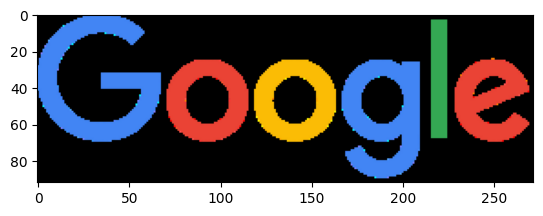

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,::-1])
plt.show()

# cv2.imshow('Obrazok', img)
# if cv2.waitKey(0) & 0xFF == ord('q'):
#     return

We can also display the individual color channels.

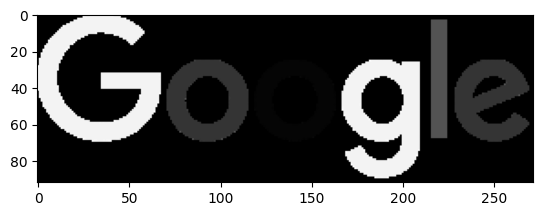

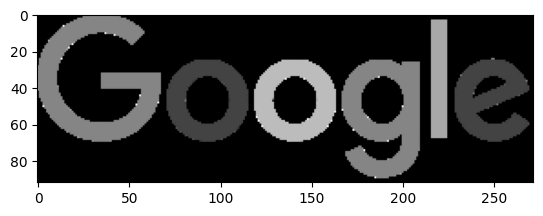

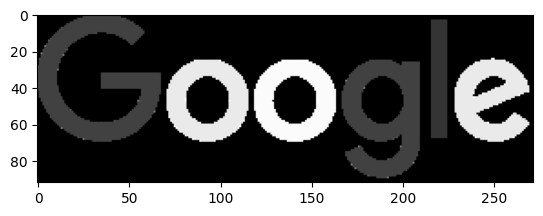

In [ ]:
plt.imshow(img[:,:,0],cmap='gray')
plt.show()
plt.imshow(img[:,:,1],cmap='gray')
plt.show()
plt.imshow(img[:,:,2],cmap='gray')
plt.show()

The images are loaded as uint8 as default so integers in the range from 0 to 255. Sometimes we want to convert them to floats. In that case the general assumption is that the intensity values are in the range \[0, 1\].

float64


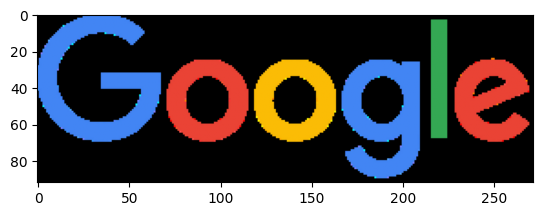

In [ ]:
img_f = img / 255
print(img_f.dtype)
plt.imshow(img_f[:,:,::-1])
plt.show()

We can easily do image manipulation. For instance we can increase intensity in one of the channels (this will cause an uint8 overflow in some parts of the image).

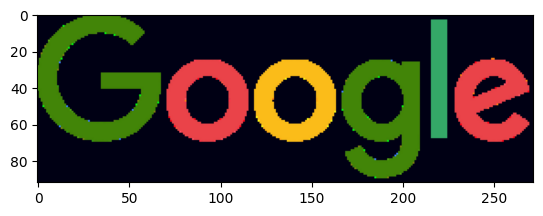

In [ ]:
img[:,:,0] += 20
plt.imshow(img[:,:,::-1])
plt.show()

It is often useful to convert the image to grayscale. We can do this with cv2.cvtColor

In [ ]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/0/0a/Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg'
!mv 'Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg' bird.jpg
!ls -l

--2023-09-28 17:05:42--  https://upload.wikimedia.org/wikipedia/commons/0/0a/Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3272846 (3.1M) [image/jpeg]
Saving to: ‘Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg’

Malachite_kingfishe 100%[===================>]   3.12M  10.9MB/s    in 0.3s    

2023-09-28 17:05:43 (10.9 MB/s) - ‘Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg’ saved [3272846/3272846]

total 3220
-rw-r--r-- 1 root root 3272846 Feb  7  2018 bird.jpg
drwx------ 5 root root    4096 Sep 28 17:01 gdrive
-rw-r--r-- 1 root root    5969 Oct 22  2019 googlelogo_color_272x92dp.png
drwxr-xr-x 2 root root    4096 Sep 28 17:01 random_dir
drwxr-xr-x 1 root root    4096 Sep 27 15:30 sample_data


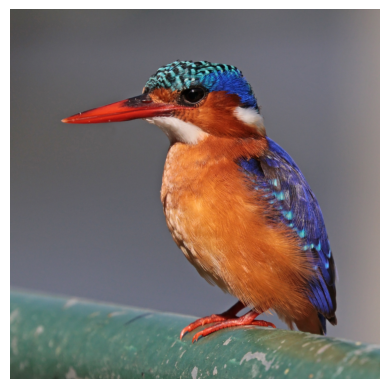

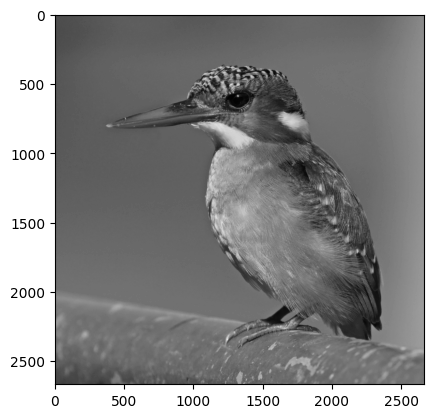

In [ ]:
img_b = cv2.imread('bird.jpg')
plt.imshow(img_b[:,:,::-1])
plt.axis('off')
plt.show()
img_g = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)
plt.imshow(img_g, cmap='gray')
plt.show()

### Exercise 2
Try to crop the head from the image of the bird and display it.

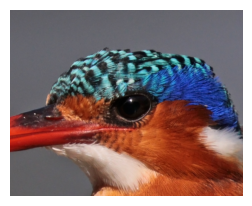

In [ ]:
...

### Exercise 3

Download an image from the internet using wget or Google Drive. Convert it to grayscale and apply gamma correction to it in the form:

$$ O = I^{\frac{1}{G}}, $$ where $I$ is the original image intensity for a given pixel, $O$ is the new intensity for a pixel and $G$ is the gamma factor. In order for this to make sense you have to convert the image from uint8 to floats. Display the image after performing the gamma correction. Implement the gamma correction as a function of two parameters.


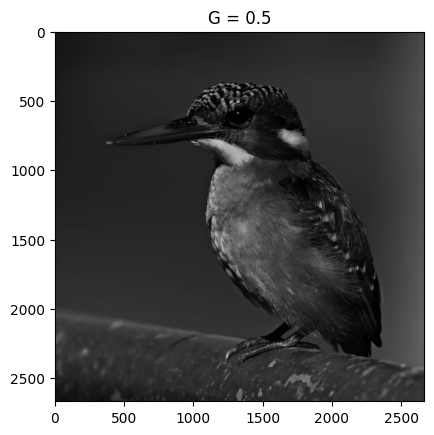

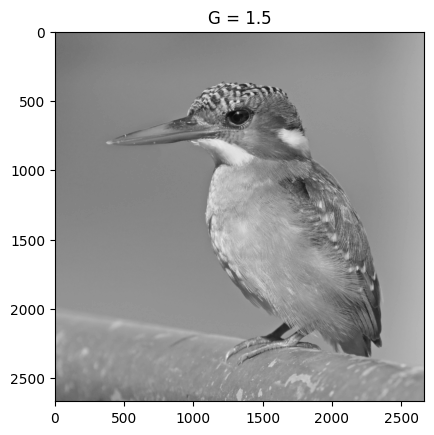

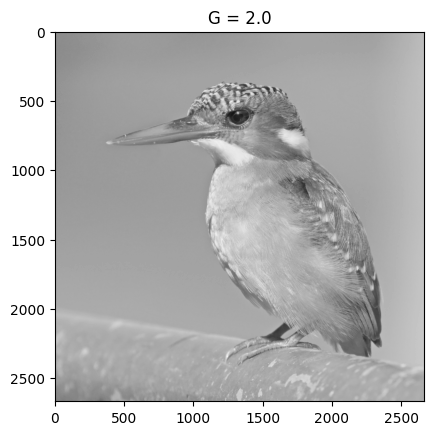

In [ ]:
...

It is often important to reisize images. Various interpolation methods are covered in image processing courses. We will be fine with using the default setting. Resize is called with `cv2.resize(img, (width, height))`

(200, 400, 3)


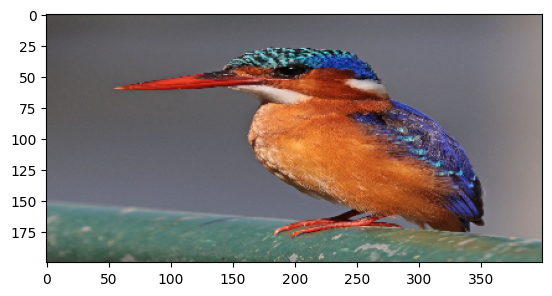

In [ ]:
img_r = cv2.resize(img_b, (400,200))
print(img_r.shape)
plt.imshow(img_r[:,:,::-1])
plt.show()

### Exercise 4
One of the most common preprocessing steps when using deep learning is to prepare a batch of images to feed the neural network. In order to do that the images have to be resized to the same size and stacked so they create a tensor with shape n_img, height, width, 3 where n_img is the number of images. The following code downloads a zip with images. Write a function which creates the desired tensor from these images. The argument of this function will be the name of the folder where the images are as well as width and height of the resized images.

In [ ]:
!wget https://github.com/kocurvik/edu/raw/master/HUPV/supplementary/cv01_images.zip

--2023-09-28 17:22:21--  https://github.com/kocurvik/edu/raw/master/HUPV/supplementary/cv01_images.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kocurvik/edu/master/HUPV/supplementary/cv01_images.zip [following]
--2023-09-28 17:22:21--  https://raw.githubusercontent.com/kocurvik/edu/master/HUPV/supplementary/cv01_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1415145 (1.3M) [application/zip]
Saving to: ‘cv01_images.zip’

cv01_images.zip     100%[===================>]   1.35M  --.-KB/s    in 0.04s   

2023-09-28 17:22:22 (32.0 MB/s) - ‘cv01_images.zip’ saved [1415145/1415145]



In [ ]:
!mkdir imgs
!unzip -d imgs cv01_images.zip

mkdir: cannot create directory ‘imgs’: File exists
Archive:  cv01_images.zip
  inflating: imgs/2152654396_a1655e8b70_b.jpg  
  inflating: imgs/2189857002_3017292973_b.jpg  
  inflating: imgs/2534756901_c0d4172dae.jpg  
  inflating: imgs/2734937629_fdbd6ea519.jpg  
  inflating: imgs/6095552162_b27989c252_b.jpg  
  inflating: imgs/6794043242_fedc3ca0c9_b.jpg  
  inflating: imgs/8102798691_89452a6af2_b.jpg  
  inflating: imgs/21232621921_004b69900d_b.jpg  
  inflating: imgs/36942627366_9323f8b526_b.jpg  


In [ ]:
def load_img_tensor(path, width, heigth):
  ...

The following code should work and display the images in a sequence.

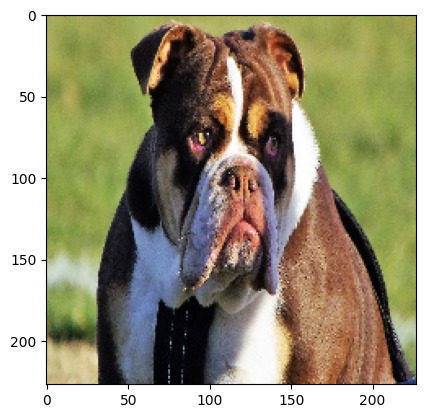

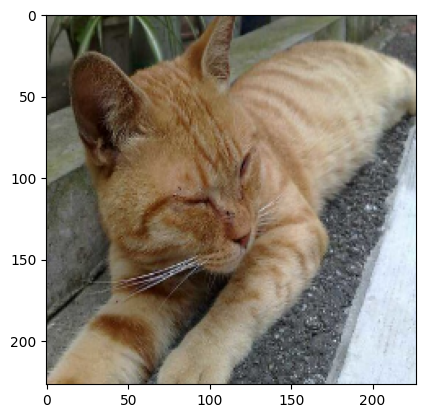

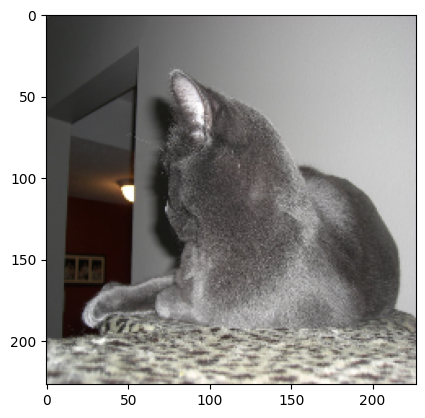

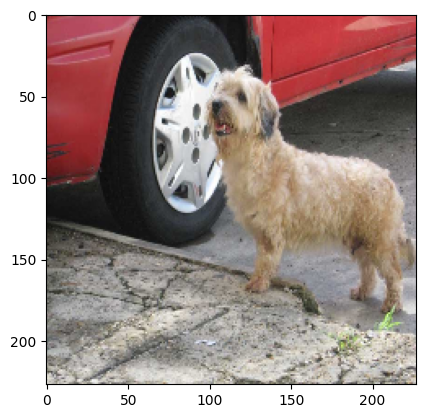

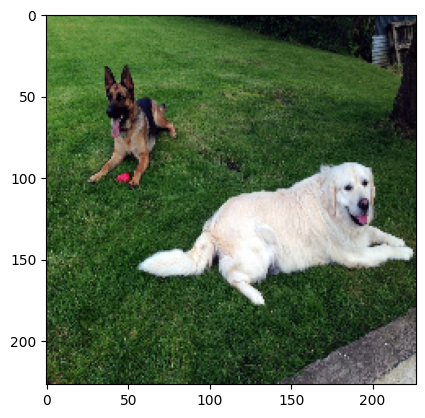

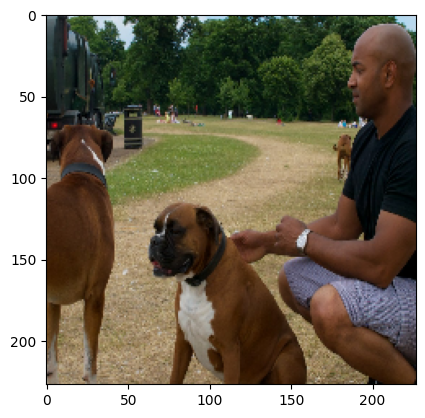

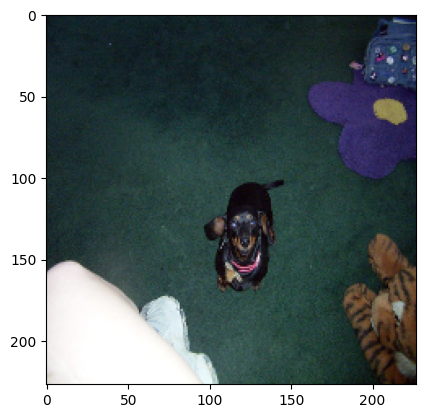

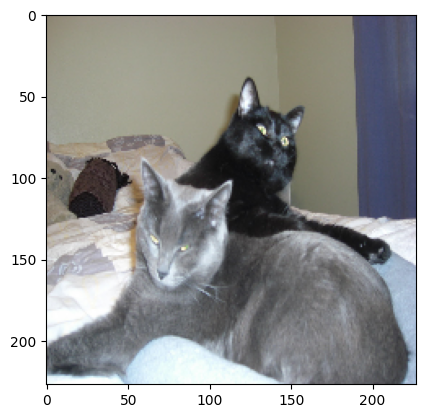

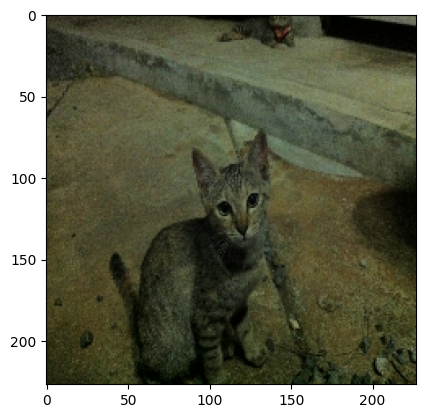

In [ ]:
t = load_img_tensor('imgs', 227, 227)
for i in range(t.shape[0]):
  plt.imshow(t[i,:,:,::-1])
  plt.show()

### OpenCV documentation
When looking for documentation for OpenCV you may run into older versions that what you are actually using. All of them are here: https://docs.opencv.org/

You can check the version of the library easily:


In [ ]:
print(cv2.__version__)